In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


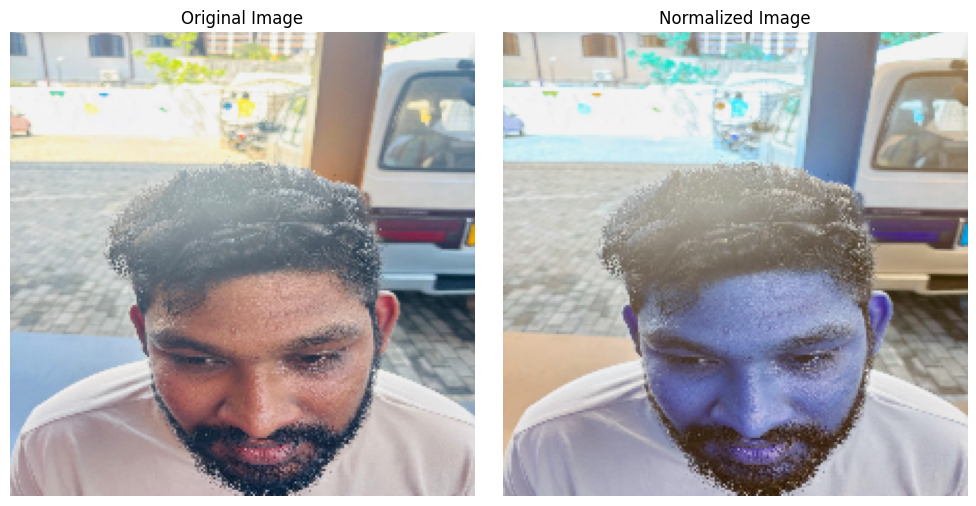

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path =r'/content/drive/MyDrive/Face/Chathuranga/WhatsApp Image 2024-10-25 at 17.41.17_1803c251.jpg'
# Load the image using cv2.imread()
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (224,224))

# Normalize the image to the range [0, 1]
normalized_image = image_resized / 255.0

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

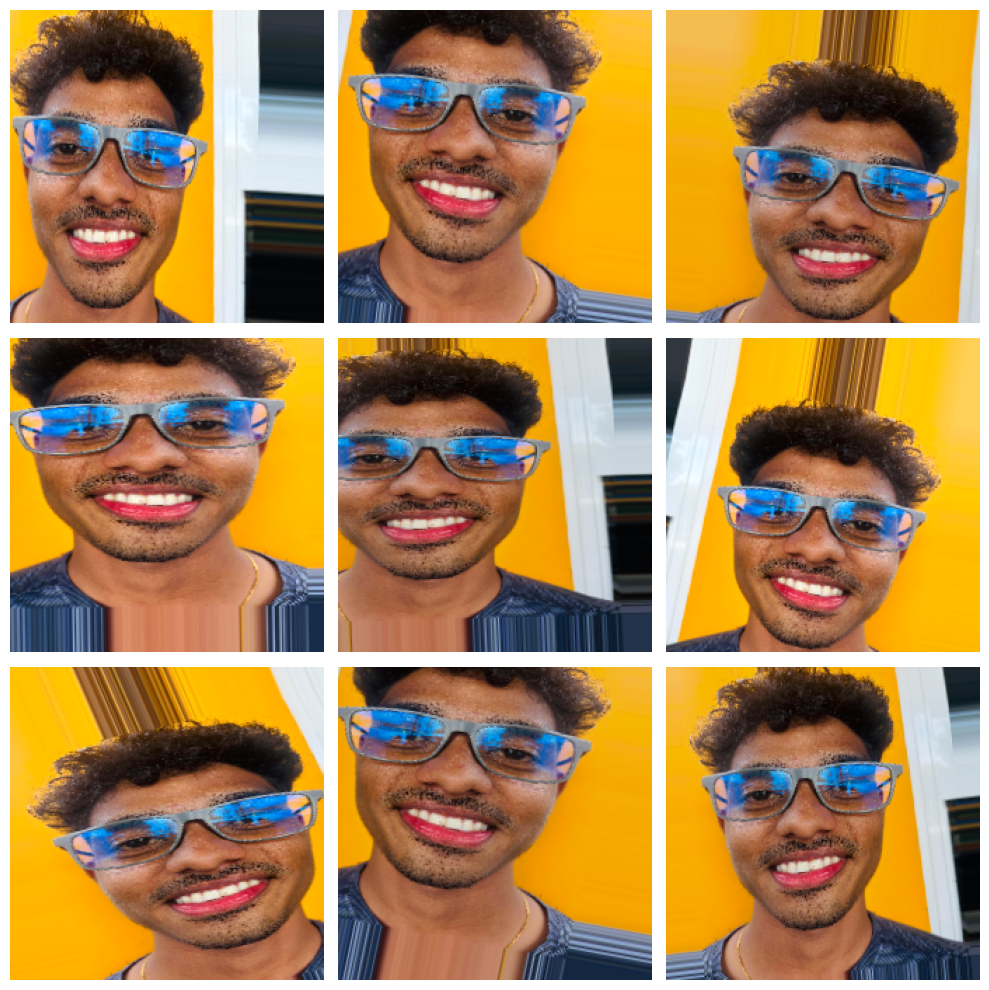

In [ ]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)


image_path =r"/content/drive/MyDrive/Face/Thevmika/WhatsApp Image 2024-10-25 at 17.41.34_2998d536.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)


augmented_images = datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_img = batch[0]
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


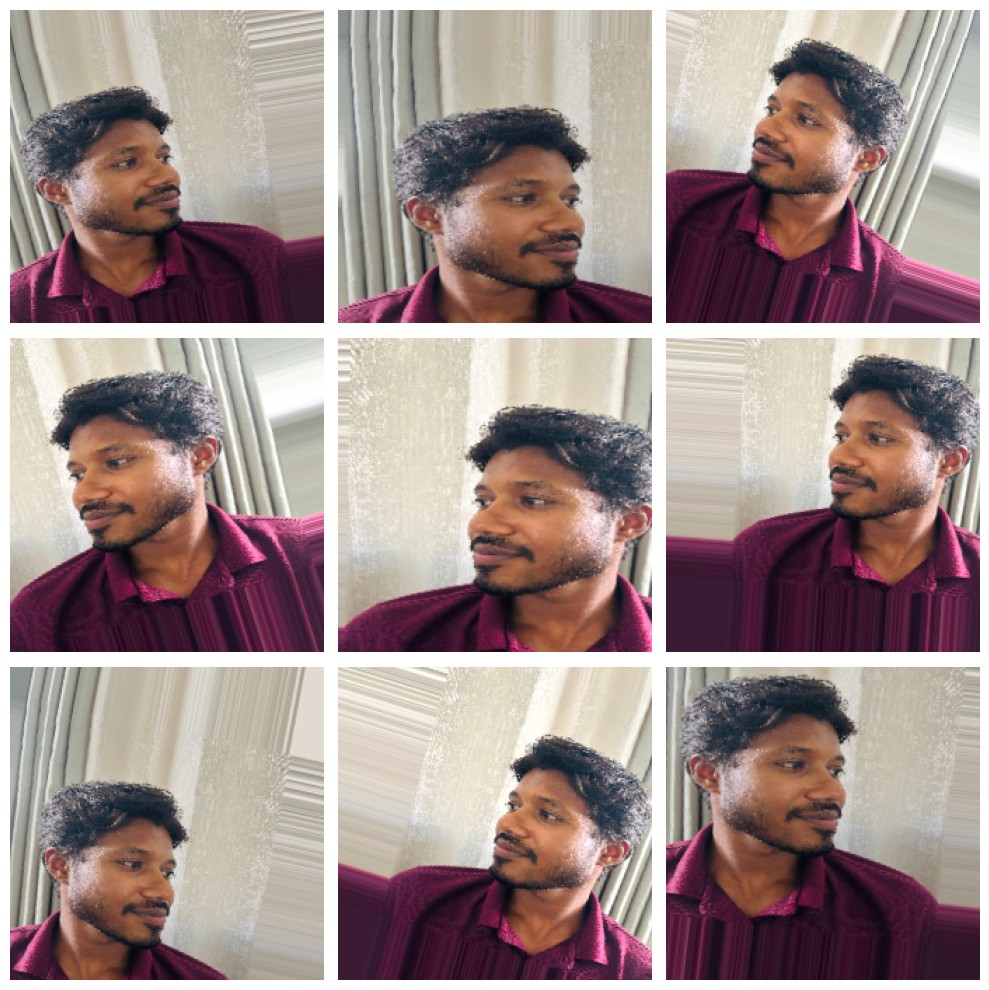

In [ ]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)


image_path =r"/content/drive/MyDrive/Face/Abdur/WhatsApp Image 2024-10-30 at 21.45.16_ef1d82b5.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)


augmented_images = datagen.flow(img_array, batch_size=1)

# Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_img = batch[0]
    plt.imshow(aug_img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import random

# Paths
original_dataset_dir = '/content/drive/MyDrive/Face'
base_dir = '/content/drive/MyDrive/Face_split'

# Create new split directories
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(base_dir, split)
    if not os.path.exists(split_dir):
        os.makedirs(split_dir)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop through each class
for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = os.listdir(class_dir)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)

    train_images = images[:n_train]
    val_images = images[n_train:n_train+n_val]
    test_images = images[n_train+n_val:]

    # Create class subfolders in each split
    for split, split_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for img in split_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_class_dir, img)
            shutil.copy(src, dst)

print("✅ Dataset successfully split into train/val/test!")


✅ Dataset successfully split into train/val/test!


In [ ]:
import os

path = "/content/drive/MyDrive/Face"
for root, dirs, files in os.walk(path):
    print(root, "->", len(files), "files")


/content/drive/MyDrive/Face -> 0 files
/content/drive/MyDrive/Face/Lahiru -> 6 files
/content/drive/MyDrive/Face/Laknadi -> 8 files
/content/drive/MyDrive/Face/Nuhan -> 8 files
/content/drive/MyDrive/Face/Dinil -> 10 files
/content/drive/MyDrive/Face/Chathuranga -> 8 files
/content/drive/MyDrive/Face/Manula -> 9 files
/content/drive/MyDrive/Face/Eshan -> 7 files
/content/drive/MyDrive/Face/Malith -> 8 files
/content/drive/MyDrive/Face/Sasindu -> 10 files
/content/drive/MyDrive/Face/Thevmika -> 9 files
/content/drive/MyDrive/Face/Abdur -> 89 files


In [ ]:
print("Train classes:", train_generator.num_classes, train_generator.class_indices)
print("Val classes:", validation_generator.num_classes, validation_generator.class_indices)
print("Test classes:", test_generator.num_classes, test_generator.class_indices)


Train classes: 12 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Face': 4, 'Lahiru': 5, 'Laknadi': 6, 'Malith': 7, 'Manula': 8, 'Nuhan': 9, 'Sasindu': 10, 'Thevmika': 11}
Val classes: 11 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Lahiru': 4, 'Laknadi': 5, 'Malith': 6, 'Manula': 7, 'Nuhan': 8, 'Sasindu': 9, 'Thevmika': 10}
Test classes: 11 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Lahiru': 4, 'Laknadi': 5, 'Malith': 6, 'Manula': 7, 'Nuhan': 8, 'Sasindu': 9, 'Thevmika': 10}


In [ ]:
import shutil
import os

train_dir = "/content/drive/MyDrive/Face_split/train"
face_class_dir = os.path.join(train_dir, "Face")

if os.path.exists(face_class_dir):
    shutil.rmtree(face_class_dir)  # Removes the whole folder
    print("Removed extra 'Face' class folder from train set")
else:
    print("No 'Face' folder found in train set")


No 'Face' folder found in train set


Found 120 images belonging to 11 classes.
Found 22 images belonging to 11 classes.
Found 40 images belonging to 11 classes.
Train classes: 11 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Lahiru': 4, 'Laknadi': 5, 'Malith': 6, 'Manula': 7, 'Nuhan': 8, 'Sasindu': 9, 'Thevmika': 10}
Val classes: 11 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Lahiru': 4, 'Laknadi': 5, 'Malith': 6, 'Manula': 7, 'Nuhan': 8, 'Sasindu': 9, 'Thevmika': 10}
Test classes: 11 {'Abdur': 0, 'Chathuranga': 1, 'Dinil': 2, 'Eshan': 3, 'Lahiru': 4, 'Laknadi': 5, 'Malith': 6, 'Manula': 7, 'Nuhan': 8, 'Sasindu': 9, 'Thevmika': 10}
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step - accuracy: 0.1647 - loss: 3.8621 - val_accuracy: 0.0455 - val_loss: 2.8594 - learning_rate: 1.0000e-04
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.3796 - loss: 2.6016 - val_accuracy: 0.1364 - val_loss: 2.7112 - learning_rate: 1.0000e-04
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.5362 - lo

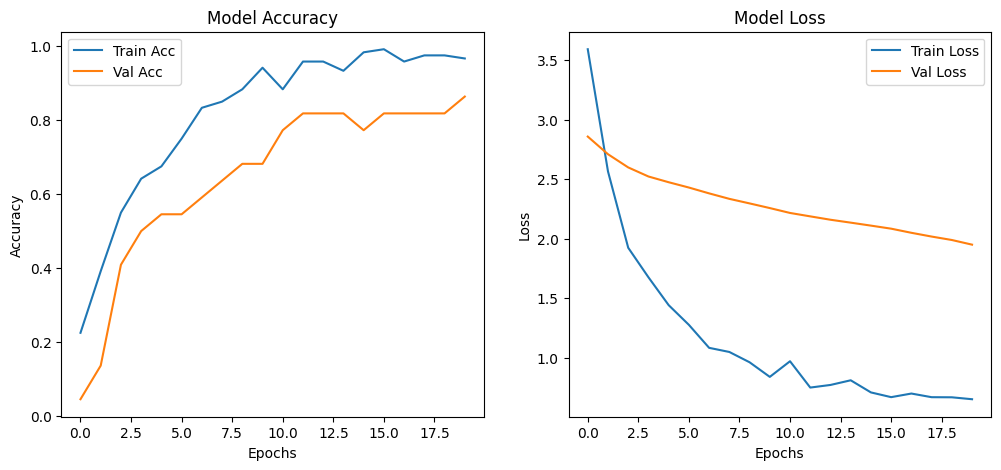

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


# Directories

train_dir = '/content/drive/MyDrive/Face_split/train'
val_dir   = '/content/drive/MyDrive/Face_split/val'
test_dir  = '/content/drive/MyDrive/Face_split/test'


# Data Generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


# Sanity check classes

print("Train classes:", train_generator.num_classes, train_generator.class_indices)
print("Val classes:", validation_generator.num_classes, validation_generator.class_indices)
print("Test classes:", test_generator.num_classes, test_generator.class_indices)

# Ensure all splits have the same classes
if not (train_generator.num_classes == validation_generator.num_classes == test_generator.num_classes):
    raise ValueError(" Class mismatch between train/val/test! Please fix dataset.")


# Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-40]:
    layer.trainable = False

x = base_model.output
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Dynamically set number of classes
num_classes = train_generator.num_classes
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)


# Train

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


# Plot Training Curves

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save('mobileNet_face_model_final_org123.h5')


model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 10,599,523 (40.43 MB)

 Trainable params: 3,340,683 (12.74 MB)

 Non-trainable params: 577,472 (2.20 MB)

 Optimizer params: 6,681,368 (25.49 MB)

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8636 - loss: 1.9512
Validation Loss: 1.9511984586715698
Validation Accuracy: 0.8636363744735718


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  3  1]
 [ 0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  1]]


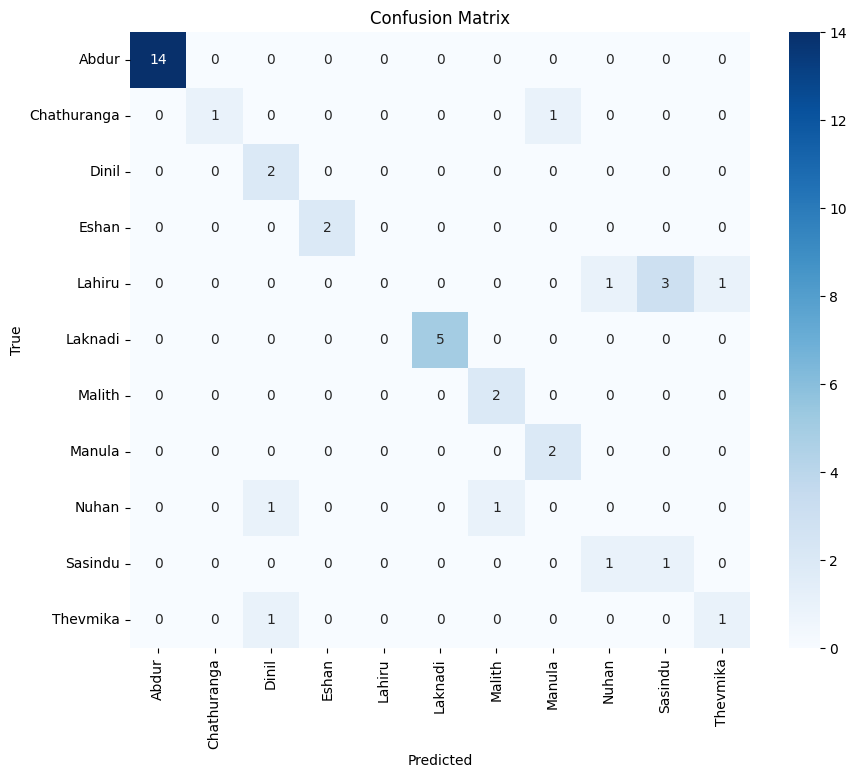

Classification Report:
              precision    recall  f1-score   support

       Abdur       1.00      1.00      1.00        14
 Chathuranga       1.00      0.50      0.67         2
       Dinil       0.50      1.00      0.67         2
       Eshan       1.00      1.00      1.00         2
      Lahiru       0.00      0.00      0.00         5
     Laknadi       1.00      1.00      1.00         5
      Malith       0.67      1.00      0.80         2
      Manula       0.67      1.00      0.80         2
       Nuhan       0.00      0.00      0.00         2
     Sasindu       0.25      0.50      0.33         2
    Thevmika       0.50      0.50      0.50         2

    accuracy                           0.75        40
   macro avg       0.60      0.68      0.62        40
weighted avg       0.70      0.75      0.71        40

Test Accuracy: 0.7500


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Performance Evaluation on Test Data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print(class_report)

# Test Accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")
